<a href="https://colab.research.google.com/github/faizantanveeer/life-expectancy-prediction/blob/main/Life_Expectancy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt
import seaborn as sns

#list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


import warnings
warnings.filterwarnings("ignore")


In [ ]:
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler, RobustScaler,OneHotEncoder
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor,XGBRFRegressor

In [ ]:
dataset = pd.read_csv("/root/.cache/kagglehub/datasets/kumarajarshi/life-expectancy-who/versions/1/Life Expectancy Data.csv")
dataset.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
dataset.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
dataset.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
dataset.isnull().sum()
null_columns =dataset.columns[dataset.isnull().any()]

print(null_columns)

Index(['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B',
       ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP',
       'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [ ]:
dataset.fillna(dataset[null_columns].mean(), inplace = True)


In [ ]:
dataset = dataset.rename(columns={'Country': 'country',
                        'Year' : 'year',
                        'Status' : 'status',
                        'Life expectancy ' : 'life_expectancy',
                        'Adult Mortality' : 'adult_mortality',
                        'infant deaths' : 'infant_deaths',
                        'Alcohol': 'alcohol',
                        'percentage expenditure' : 'percent_expenditure',
                        'Hepatitis B' : 'hepatitis_b',
                        'Measles ' : 'measles',
                        ' BMI ' : 'bmi',
                        'under-five deaths ' : 'under_five_deaths',
                        'Polio' : 'polio',
                        'Total expenditure' : 'tot_expenditure',
                        'Diphtheria ' : 'diphteria',
                        ' HIV/AIDS' : 'hiv_aids',
                        'GDP' : 'gdp',
                        'Population' : 'population',
                        ' thinness  1-19 years' : 'thinness_1to19years',
                        ' thinness 5-9 years' : 'thinness_5to9years',
                        'Income composition of resources' : 'human_development_index',
                        'Schooling' : 'school_years'})

In [ ]:

dataset.columns = dataset.columns.str.strip()
print(dataset.columns)
dataset.isnull().sum()

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percent_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'tot_expenditure',
       'diphteria', 'hiv_aids', 'gdp', 'population', 'thinness_1to19years',
       'thinness_5to9years', 'human_development_index', 'school_years'],
      dtype='object')


,0
country,0
year,0
status,0
life_expectancy,0
adult_mortality,0
infant_deaths,0
alcohol,0
percent_expenditure,0
hepatitis_b,0
measles,0


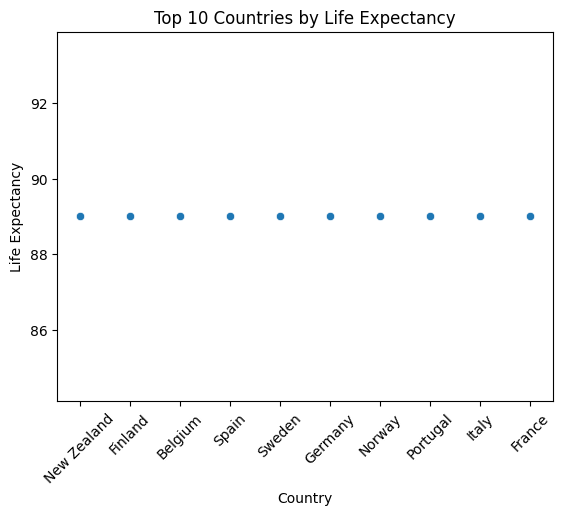

In [ ]:
dataset_sorted = dataset.sort_values(by='life_expectancy', ascending=False)

# Select the top 10 countries
top_10_countries = dataset_sorted.head(10)

# Create a scatter plot for the top 10 countries
sns.scatterplot(x='country', y='life_expectancy', data=top_10_countries)
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Life Expectancy')
plt.xlabel('Country')

plt.ylabel('Life Expectancy')
plt.show()

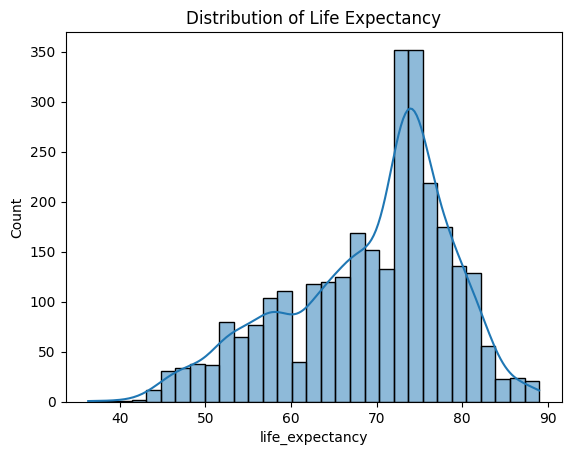

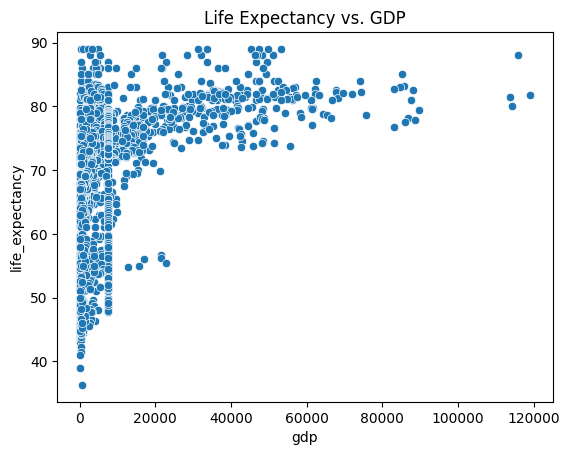

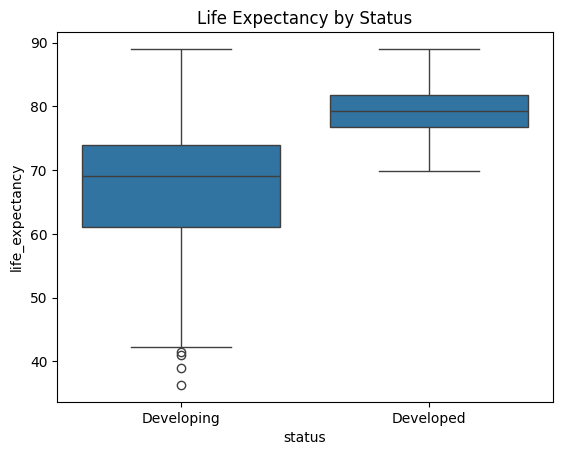

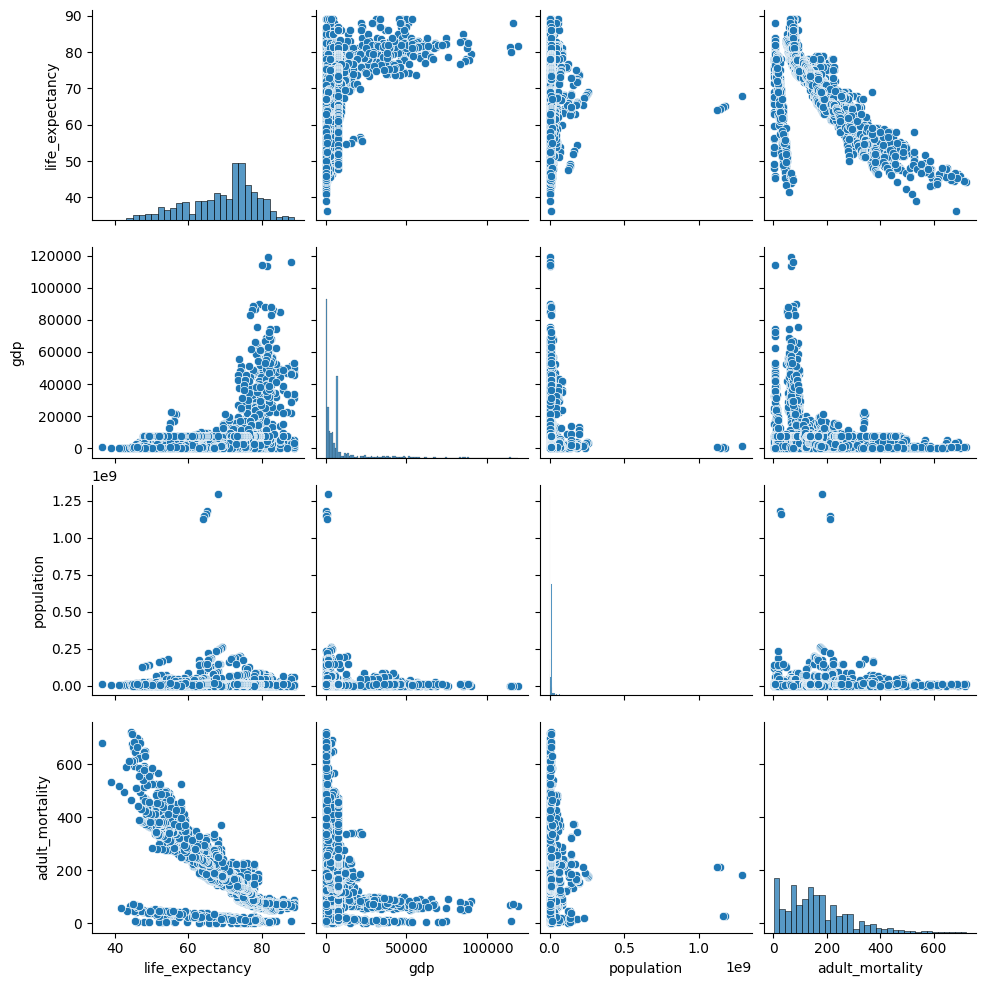

In [ ]:
sns.histplot(dataset['life_expectancy'], kde=True)
plt.title('Distribution of Life Expectancy')
plt.show()

# Scatter plot of Life Expectancy vs. GDP
sns.scatterplot(x='gdp', y='life_expectancy', data=dataset)
plt.title('Life Expectancy vs. GDP')
plt.show()

# Box plot of Life Expectancy by Status
sns.boxplot(x='status', y='life_expectancy', data=dataset)
plt.title('Life Expectancy by Status')
plt.show()

# Pair plot for multiple numerical features
sns.pairplot(dataset[['life_expectancy', 'gdp', 'population', 'adult_mortality']])
plt.show()

In [ ]:
dataset

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percent_expenditure,hepatitis_b,measles,...,polio,tot_expenditure,diphteria,hiv_aids,gdp,population,thinness_1to19years,thinness_5to9years,human_development_index,school_years
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
dataset.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percent_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'tot_expenditure',
       'diphteria', 'hiv_aids', 'gdp', 'population', 'thinness_1to19years',
       'thinness_5to9years', 'human_development_index', 'school_years'],
      dtype='object')

In [ ]:
dataset.describe(include="object")

,country,status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


In [ ]:
!pip install skimpy
from skimpy import skim


In [ ]:
skim(dataset)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2938   │ │ float64     │ 16    │                                                          │
│ │ Number of columns │ 22     │ │ int64       │ 4     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name  ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0    ┃ p25    ┃ p50     ┃ p75      ┃ p100       ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ year         │  0 │    0 │     2008 │    4.614 │  2000 │   2004 │    2008 │     2012 │       2015 │ ▇▅▇▅▇▇ │  │
│ │ life_expecta │  0 │    0 │    69.22 │    9.508 │  36.3 │   63.2 │      72 │     75.6 │         89 │  ▁▃▅▇▂ │  │
│ │ ncy          │    │      │          │          │       │        │         │          │            │        │  │
│ │ adult_mortal │  0 │    0 │    164.8 │    124.1 │     1 │     74 │     144 │      227 │        723 │  ▇▇▃▁  │  │
│ │ ity          │    │      │          │          │       │        │         │          │            │        │  │
│ │ infant_death │  0 │    0 │     30.3 │    117.9 │     0 │      0 │       3 │       22 │       1800 │   ▇    │  │
│ │ s            │    │      │          │          │       │        │         │          │            │        │  │
│ │ alcohol      │  0 │    0 │    4.603 │    3.916 │  0.01 │  1.093 │    4.16 │     7.39 │      17.87 │ ▇▅▃▂▁  │  │
│ │ percent_expe │  0 │    0 │    738.3 │     1988 │     0 │  4.685 │   64.91 │    441.5 │      19480 │   ▇    │  │
│ │ nditure      │    │      │          │          │       │        │         │          │            │        │  │
│ │ hepatitis_b  │  0 │    0 │    80.94 │    22.59 │     1 │  80.94 │      87 │       96 │         99 │ ▁  ▁▅▇ │  │
│ │ measles      │  0 │    0 │     2420 │    11470 │     0 │      0 │      17 │    360.2 │     212200 │   ▇    │  │
│ │ bmi          │  0 │    0 │    38.32 │    19.93 │     1 │   19.4 │      43 │     56.1 │       87.3 │ ▃▆▃▇▃  │  │
│ │ under_five_d │  0 │    0 │    42.04 │    160.4 │     0 │      0 │       4 │       28 │       2500 │   ▇    │  │
│ │ eaths        │    │      │          │          │       │        │         │          │            │        │  │
│ │ polio        │  0 │    0 │    82.55 │    23.35 │     3 │     78 │      93 │       97 │         99 │ ▁  ▁▂▇ │  │
│ │ tot_expendit │  0 │    0 │    5.938 │      2.4 │  0.37 │   4.37 │   5.938 │     7.33 │       17.6 │  ▂▇▅▁  │  │
│ │ ure          │    │      │          │          │       │        │         │          │            │        │  │
│ │ diphteria    │  0 │    0 │    82.32 │    23.64 │     2 │     78 │      93 │       97 │         99 │ ▁  ▁▂▇ │  │
│ │ hiv_aids     │  0 │    0 │    1.742 │    5.078 │   0.1 │    0.1 │     0.1 │      0.8 │       50.6 │   ▇    │  │
│ │ gdp          │  0 │    0 │     7483 │    13140 │ 1.681 │  580.5 │    3117 │     7483 │     119200 │   ▇    │  │
│ │ population   │  0 │    0 │ 12750000 │ 53820000 │    

In [ ]:
num_col = []
for col in dataset.columns:
    if dataset[col].dtype != "object":
        num_col.append(col)
print(num_col)

['year', 'life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol', 'percent_expenditure', 'hepatitis_b', 'measles', 'bmi', 'under_five_deaths', 'polio', 'tot_expenditure', 'diphteria', 'hiv_aids', 'gdp', 'population', 'thinness_1to19years', 'thinness_5to9years', 'human_development_index', 'school_years']


In [ ]:
data_corr = dataset[['year', 'life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol', 'percent_expenditure', 'hepatitis_b', 'measles', 'bmi', 'under_five_deaths', 'polio', 'tot_expenditure', 'diphteria', 'hiv_aids', 'gdp', 'population', 'thinness_1to19years', 'thinness_5to9years', 'human_development_index', 'school_years']].corr()['life_expectancy'].sort_values()
data_corr

,life_expectancy
adult_mortality,-0.696359
hiv_aids,-0.556457
thinness_1to19years,-0.472162
thinness_5to9years,-0.466629
under_five_deaths,-0.222503
infant_deaths,-0.196535
measles,-0.157574
population,-0.019638
year,0.169623
hepatitis_b,0.203771


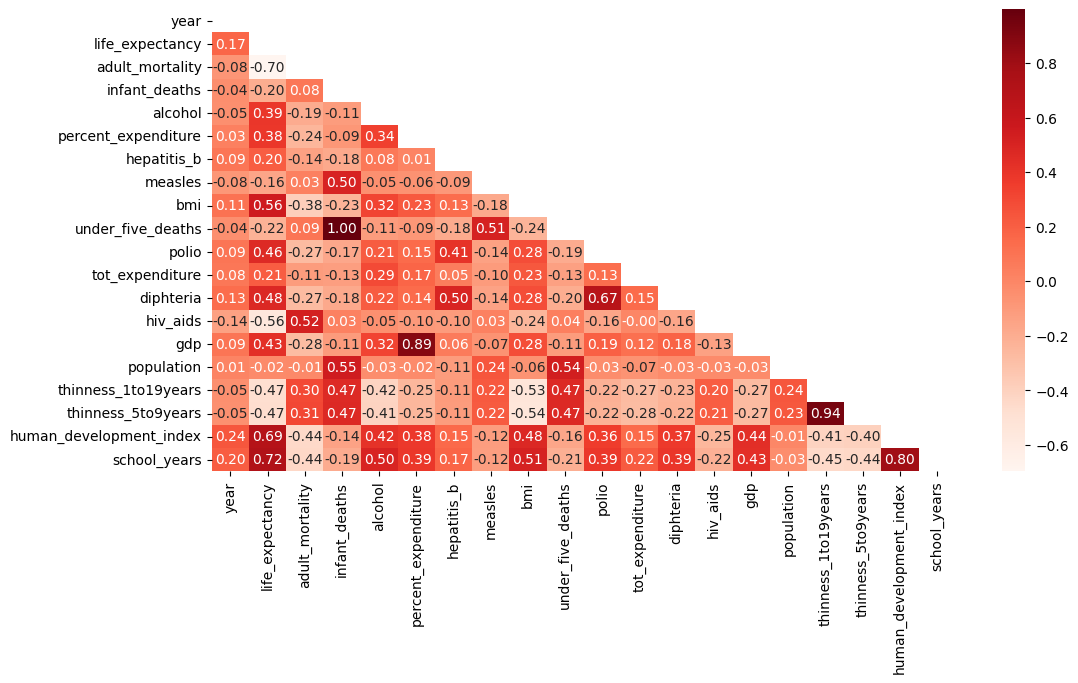

In [ ]:
corr = dataset[num_col].corr()
mask = np.triu(corr)
mask=mask
plt.figure(figsize=(12, 6))

sns.heatmap(corr, annot=True,mask=mask, cmap='Reds', fmt='.2f')

plt.show()

In [ ]:
dataset.drop(columns = ['bmi', 'infant_deaths', 'thinness_5to9years'])

,country,year,status,life_expectancy,adult_mortality,alcohol,percent_expenditure,hepatitis_b,measles,under_five_deaths,polio,tot_expenditure,diphteria,hiv_aids,gdp,population,thinness_1to19years,human_development_index,school_years
0,Afghanistan,2015,Developing,65.0,263.0,0.01,71.279624,65.0,1154,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,0.01,73.523582,62.0,492,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,0.01,73.219243,64.0,430,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,0.01,78.184215,67.0,2787,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,0.01,7.097109,68.0,3013,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,4.36,0.000000,68.0,31,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,4.06,0.000000,7.0,998,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,4.43,0.000000,73.0,304,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,1.72,0.000000,76.0,529,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,0.427,9.8


In [ ]:
to_remove = ['bmi', 'infant_deaths', 'thinness_5to9years']

print("Before Remove: ", len(num_col))
for item in to_remove:
    if item in num_col:
        num_col.remove(item)

print("After Remove: ", len(num_col))
print(num_col)


Before Remove:  20
After Remove:  17
['year', 'life_expectancy', 'adult_mortality', 'alcohol', 'percent_expenditure', 'hepatitis_b', 'measles', 'under_five_deaths', 'polio', 'tot_expenditure', 'diphteria', 'hiv_aids', 'gdp', 'population', 'thinness_1to19years', 'human_development_index', 'school_years']


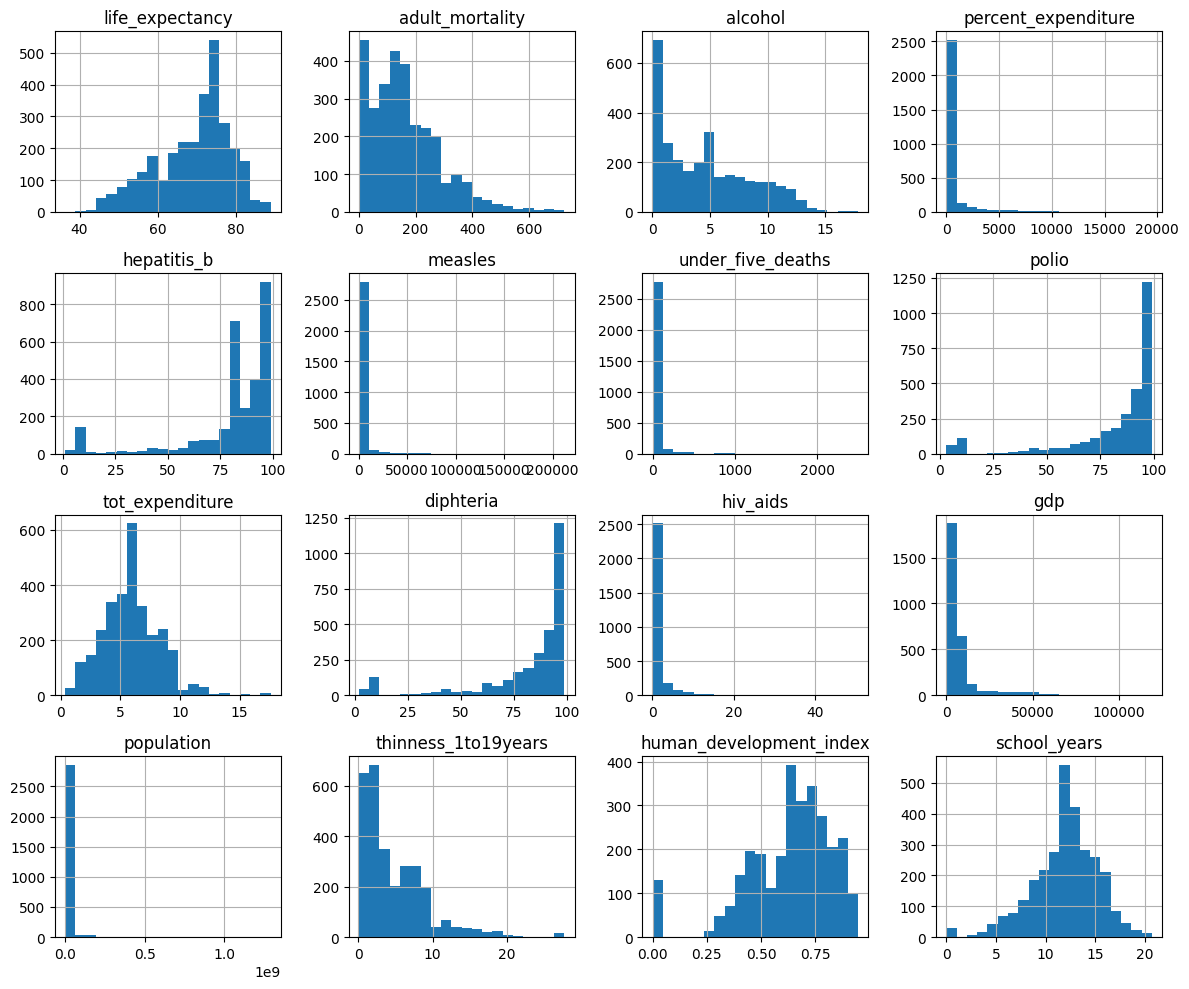

In [ ]:
dataset[num_col].drop(columns = 'year').hist(bins=20,figsize=(12,10))
plt.tight_layout()
plt.show()

In [ ]:
!pip install pycountry-convert

  Using cached pycountry_convert-0.7.2-py3-none-any.whl.metadata (7.2 kB)
  Using cached pprintpp-0.4.0-py2.py3-none-any.whl.metadata (7.9 kB)
  Using cached pycountry-24.6.1-py3-none-any.whl.metadata (12 kB)
  Using cached pytest_mock-3.14.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached pytest_cov-6.0.0-py3-none-any.whl.metadata (27 kB)
  Using cached repoze.lru-0.7-py3-none-any.whl.metadata (1.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 4.4 MB/s eta 0:00:00


In [ ]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2, convert_continent_code_to_continent_name
def map_country2continent(cname:str):
  try:
    code = country_alpha2_to_continent_code(country_name_to_country_alpha2(cname))
    continent = convert_continent_code_to_continent_name(code)
    return continent
  except Exception as e:
    if str(e) == '"Invalid Country Alpha-2 code: \'TL\'"':
        continent = 'Asia'
        return continent

In [ ]:
dataset['country'].replace('Republic of Korea', 'South Korea', inplace=True)
dataset['continent'] =dataset['country'].apply(map_country2continent)
dataset.drop(columns=['country'], inplace=True)

In [ ]:
dataset['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania', None], dtype=object)

In [ ]:
# Encoded Catagorical Variables

dataset['continent'] = LabelEncoder().fit_transform(dataset['continent'])

dataset['year'] = LabelEncoder().fit_transform(dataset['year'])

dataset['status'] = LabelEncoder().fit_transform(dataset['status'])



In [ ]:
# Outlier Equation
def outlier_threshhold(dataframe,column,q1=0.25,q3=0.75):
    Q1=dataframe[column].quantile(q1)
    Q3=dataframe[column].quantile(q3)
    iqr=Q3-Q1
    up_limit=Q3+1.5*iqr
    low_limit=Q1-1.5*iqr
    return low_limit,up_limit

#Outlier Percentage
def outlier_percentage(dataframe,column):
    low_limit,up_limit=outlier_threshhold(dataframe,column)
    outliers= [x for x in dataframe[col] if (x>up_limit) | (x<low_limit)]
    print(col)
    print("Outliers percentage:", len(outliers)/(dataframe[column].shape[0])*100,"%")
    print("-------------------------")
#Checking Outliers
def check_outliers(dataframe,column):
    low_limit,up_limit=outlier_threshhold(dataframe,column)
    outliers=(dataframe[column]>up_limit) | (dataframe[column]<low_limit)
    if outliers.any():
        return True
    else:
        return False

In [ ]:
for col in dataset[num_col]:
    outlier_percentage(dataset, col)

year
Outliers percentage: 0.0 %
-------------------------
life_expectancy
Outliers percentage: 0.5786249149081008 %
-------------------------
adult_mortality
Outliers percentage: 2.9271613342409806 %
-------------------------
alcohol
Outliers percentage: 0.10211027910142954 %
-------------------------
percent_expenditure
Outliers percentage: 13.240299523485364 %
-------------------------
hepatitis_b
Outliers percentage: 10.755616065350578 %
-------------------------
measles
Outliers percentage: 18.447923757658273 %
-------------------------
under_five_deaths
Outliers percentage: 13.410483321987746 %
-------------------------
polio
Outliers percentage: 9.496255956432947 %
-------------------------
tot_expenditure
Outliers percentage: 1.7358747447243021 %
-------------------------
diphteria
Outliers percentage: 10.142954390742002 %
-------------------------
hiv_aids
Outliers percentage: 18.447923757658273 %
-------------------------
gdp
Outliers percentage: 10.211027910142954 %
---------

In [ ]:
def replace_with_threshholds(dataframe,dataframe2,column):
    low_limit,up_limit=outlier_threshhold(dataframe,column)
    dataframe.loc[(dataframe[column]<low_limit),column]=low_limit
    dataframe.loc[(dataframe[column]>up_limit),column]=up_limit
    dataframe2.loc[(dataframe2[column]<low_limit),column]=low_limit
    dataframe2.loc[(dataframe2[column]>up_limit),column]=up_limit
for column in (dataset[num_col].drop(columns='year').columns):
    replace_with_threshholds(dataset,dataset,column)

In [ ]:
for col in dataset[num_col]:
    outlier_percentage(dataset, col)

year
Outliers percentage: 0.0 %
-------------------------
life_expectancy
Outliers percentage: 0.0 %
-------------------------
adult_mortality
Outliers percentage: 0.0 %
-------------------------
alcohol
Outliers percentage: 0.0 %
-------------------------
percent_expenditure
Outliers percentage: 0.0 %
-------------------------
hepatitis_b
Outliers percentage: 0.0 %
-------------------------
measles
Outliers percentage: 0.0 %
-------------------------
under_five_deaths
Outliers percentage: 0.0 %
-------------------------
polio
Outliers percentage: 0.0 %
-------------------------
tot_expenditure
Outliers percentage: 0.0 %
-------------------------
diphteria
Outliers percentage: 0.0 %
-------------------------
hiv_aids
Outliers percentage: 0.0 %
-------------------------
gdp
Outliers percentage: 0.0 %
-------------------------
population
Outliers percentage: 0.0 %
-------------------------
thinness_1to19years
Outliers percentage: 0.0 %
-------------------------
human_development_index
Ou

In [ ]:
X = dataset.drop(columns = ['life_expectancy'])
y = dataset['life_expectancy']

print(X, y)



      year  status  adult_mortality  infant_deaths  alcohol  \
0       15       1            263.0             62     0.01   
1       14       1            271.0             64     0.01   
2       13       1            268.0             66     0.01   
3       12       1            272.0             69     0.01   
4       11       1            275.0             71     0.01   
...    ...     ...              ...            ...      ...   
2933     4       1            456.5             27     4.36   
2934     3       1            456.5             26     4.06   
2935     2       1             73.0             25     4.43   
2936     1       1            456.5             25     1.72   
2937     0       1            456.5             24     1.68   

      percent_expenditure  hepatitis_b  measles   bmi  under_five_deaths  ...  \
0               71.279624    65.000000  900.625  19.1                 70  ...   
1               73.523582    62.000000  492.000  18.6                 70  ...   


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes to verify consistency
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2350, 21) (2350,)
(588, 21) (588,)


In [ ]:
dataset.isnull().any()

,0
year,False
status,False
life_expectancy,False
adult_mortality,False
infant_deaths,False
alcohol,False
percent_expenditure,False
hepatitis_b,False
measles,False
bmi,False


In [ ]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
feature_importance=model.feature_importances_

#Create a DataFrame to associate feature names with their importances
feature_importance_df=pd.DataFrame({'Feature':X_train.columns,'Importance':feature_importance})

#Sort feature by importance
feature_importance_df=feature_importance_df.sort_values(by='Importance',ascending=False)

In [ ]:
feature_importance_df

,Feature,Importance
13,hiv_aids,0.584076
2,adult_mortality,0.143792
18,human_development_index,0.130980
20,continent,0.038539
19,school_years,0.019874
0,year,0.010761
9,under_five_deaths,0.009673
17,thinness_5to9years,0.008882
8,bmi,0.008167
4,alcohol,0.007206


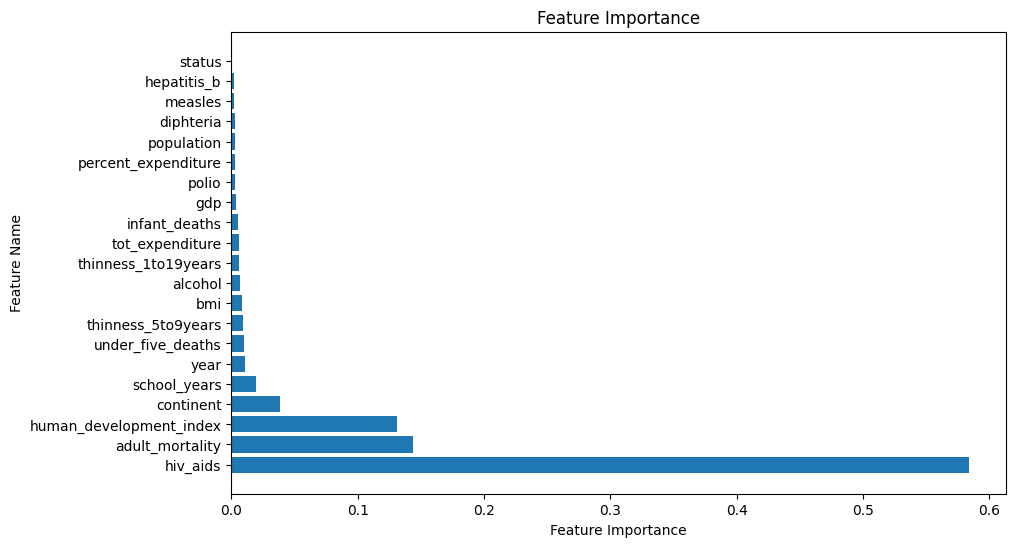

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance')
plt.show()

In [ ]:
model_name=[]
r2score=[]
rmse=[]
models=[
    GradientBoostingRegressor(random_state=42),
    SVR(),
    RandomForestRegressor(random_state=42),
    LinearRegression(),
    ExtraTreesRegressor(random_state=42),
    AdaBoostRegressor(random_state=42),
    DecisionTreeRegressor(random_state=42),
    XGBRegressor(random_state=42),
    XGBRFRegressor(random_state=42)
]

for model in models:
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test)
    model_name.append(model.__class__.__name__)
    r2score.append(str(r2_score( y_test , y_pred ) * 100 ))
    rmse.append(str(mean_squared_error( y_test , y_pred,squared=False )))

In [ ]:
models_df = pd.DataFrame({"Model-Name":model_name, "R2_score": r2score ,'RMSE':rmse})
models_df = models_df.astype({"R2_score": float, "RMSE": float})
models_df = models_df.sort_values(by = "R2_score", ascending = False)

In [ ]:
models_df

,Model-Name,R2_score,RMSE
4,ExtraTreesRegressor,97.399056,1.500017
2,RandomForestRegressor,96.849542,1.650887
7,XGBRegressor,96.481513,1.744651
0,GradientBoostingRegressor,94.787199,2.123568
8,XGBRFRegressor,94.355830,2.209686
6,DecisionTreeRegressor,92.234634,2.591860
5,AdaBoostRegressor,89.934291,2.950888
3,LinearRegression,85.831482,3.501006
1,SVR,-8.377857,9.682798


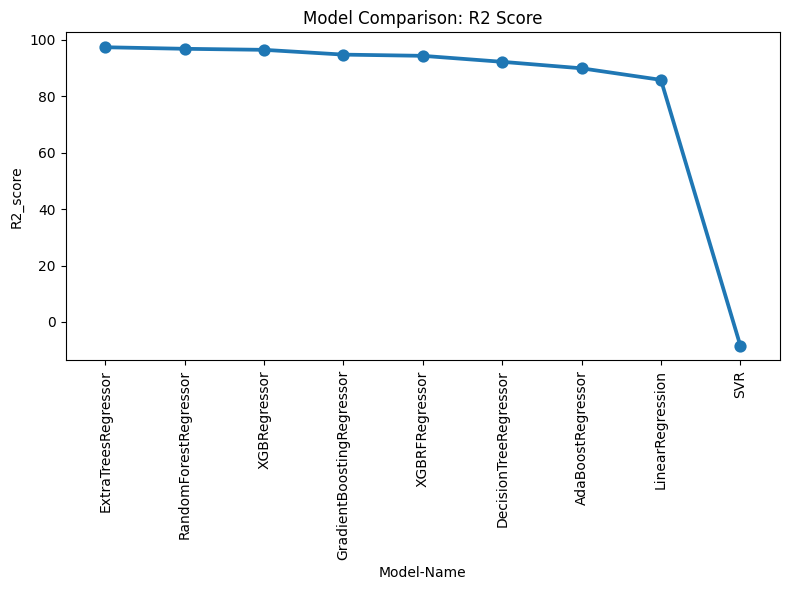

In [ ]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model-Name',y='R2_score',data=models_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: R2 Score')
plt.tight_layout()
plt.show()

In [ ]:
models_df

,Model-Name,R2_score,RMSE
4,ExtraTreesRegressor,97.399056,1.500017
2,RandomForestRegressor,96.849542,1.650887
7,XGBRegressor,96.481513,1.744651
0,GradientBoostingRegressor,94.787199,2.123568
8,XGBRFRegressor,94.355830,2.209686
6,DecisionTreeRegressor,92.234634,2.591860
5,AdaBoostRegressor,89.934291,2.950888
3,LinearRegression,85.831482,3.501006
1,SVR,-8.377857,9.682798


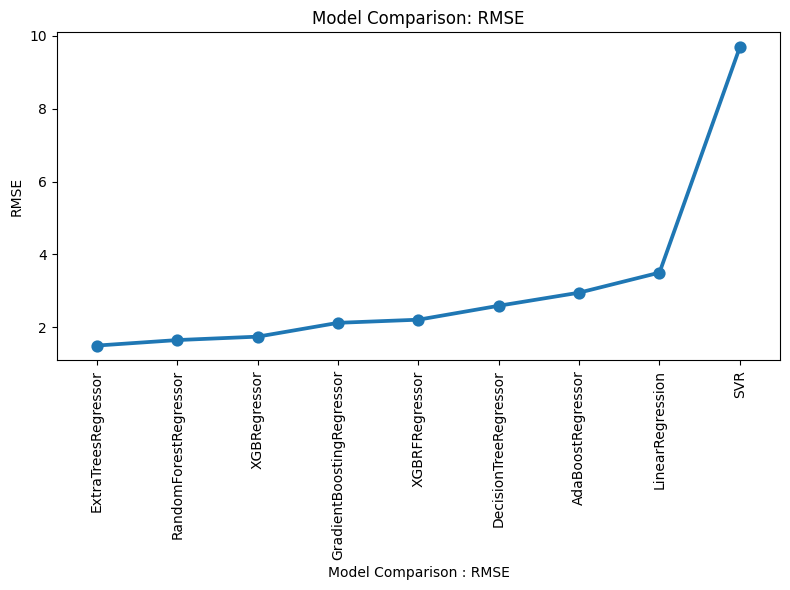

In [ ]:
plt.figure(figsize=(8,6))
plt.xlabel('Model Comparison : RMSE')
sns.pointplot(x='Model-Name',y='RMSE',data=models_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: RMSE')
plt.tight_layout()
plt.show()


In [ ]:
fm = ExtraTreesRegressor(random_state = 42)
cross_val=cross_val_score(fm,X_test,y_test,scoring='r2',cv=20)
cross_val

array([0.89396019, 0.92848623, 0.93672313, 0.96575239, 0.90801854,
       0.87553615, 0.95593933, 0.93953616, 0.95528176, 0.96141021,
       0.91696452, 0.90913522, 0.94646475, 0.96014445, 0.94973385,
       0.95307067, 0.91742256, 0.91445834, 0.94539973, 0.90651249])

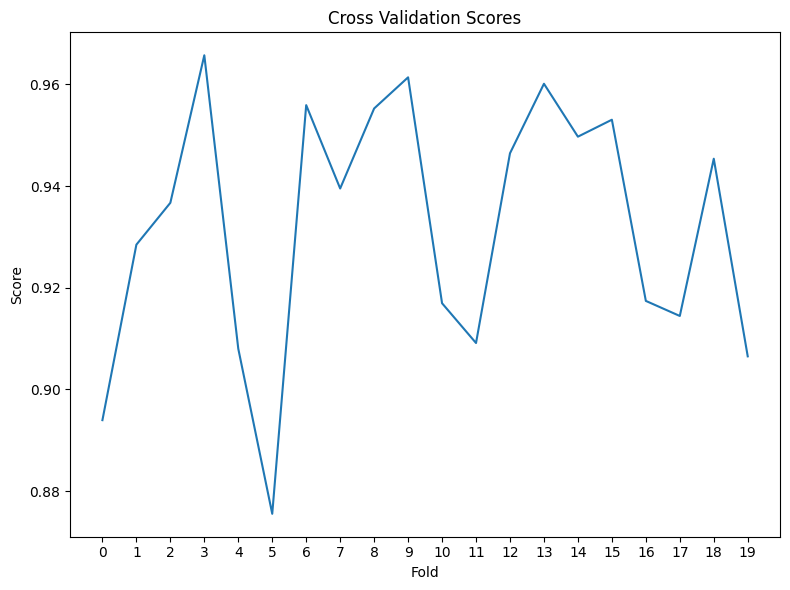

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(cross_val)
plt.title("Cross Validation Scores")
plt.ylabel("Score")
plt.xlabel("Fold")
plt.xticks(np.arange(0,20))
plt.tight_layout()
plt.show()